# Section 1: Exploratory Data Analysis (EDA)

Dataset A consists of daily transaction data from a store, containing 19,351 rows and 3 columns. The dataset includes information on ‘Member_number’, ‘Date’ and ‘itemDescription’. Initial exploration reveals that the ‘Date’ column is initially in string format but is subsequently converted to datetime objects for analysis. Upon conducting missing value checks, it is evident that there are no missing values present in any of the columns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Dataset_A.csv")
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
print('Number of rows: ', data.shape[0])
print('Number of columns: ', data.shape[1])

Number of rows:  19351
Number of columns:  3


In [4]:
# Check the available columns
print('Available columns:\n', data.columns)

# Get the data types of each column
print(data.dtypes)
print()

Available columns:
 Index(['Member_number', 'Date', 'itemDescription'], dtype='object')
Member_number       int64
Date               object
itemDescription    object
dtype: object



In [5]:
# Convert date strings to datetime objects
data['Date'] = pd.to_datetime(data['Date'])

# Verify the changes of Date column data type
data.dtypes

C:\Users\user\AppData\Local\Temp\ipykernel_9888\3755488165.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


Member_number               int64
Date               datetime64[ns]
itemDescription            object
dtype: object

In [6]:
# Check missing values
missing_values = data.isnull().sum()
print(missing_values)

Member_number      0
Date               0
itemDescription    0
dtype: int64


In [7]:
# Check the distribution of unique values in each column
data.value_counts().head(100)

Member_number  Date        itemDescription 
2061           2015-12-27  tropical fruit      3
3055           2015-08-18  other vegetables    3
4676           2015-01-15  sausage             3
2779           2015-10-17  whole milk          3
1994           2015-11-03  whole milk          3
                                              ..
3679           2015-11-27  grapes              2
3797           2015-10-08  other vegetables    2
1213           2015-03-03  beef                2
2433           2015-03-14  beef                2
2107           2015-01-03  frankfurter         2
Length: 100, dtype: int64

In [8]:
# Check duplicated rows
duplicated_rows = data.duplicated().sum()
print('Number of duplicated rows: ', duplicated_rows)

Number of duplicated rows:  196


In [9]:
# Remove duplicated rows
data.drop_duplicates(inplace=True)

# Verify the changes made
print ('Number of rows: ', data.shape[0])
print ('Number of columns: ', data.shape[1])

Number of rows:  19155
Number of columns:  3


In [10]:
# Check total no. of items
total_items = data['itemDescription'].nunique()
total_items

163

Based on analysis of unique values and duplicated rows, it was discovered that there were 196 duplicated rows where the same member bought the same item on the same date. These duplicated transactions were considered redundant and were subsequently removed, resulting in dataset with 19155 rows. The total number of unique items in the dataset was found to be 163.

### Top 10 Best-Selling Items

In [11]:
# Find the top 10 best-selling items
top_10_items = data['itemDescription'].value_counts().head(11)
top_10_items


whole milk          1511
other vegetables    1128
sausage              903
tropical fruit       866
rolls/buns           808
root vegetables      717
citrus fruit         711
soda                 640
frankfurter          565
pip fruit            553
yogurt               552
Name: itemDescription, dtype: int64

In [12]:
# Rename the columns for clarity
top_10_items = top_10_items.reset_index()
top_10_items.columns = ['Item', 'Quantity']
top_10_items

,Item,Quantity
0,whole milk,1511
1,other vegetables,1128
2,sausage,903
3,tropical fruit,866
4,rolls/buns,808
5,root vegetables,717
6,citrus fruit,711
7,soda,640
8,frankfurter,565
9,pip fruit,553


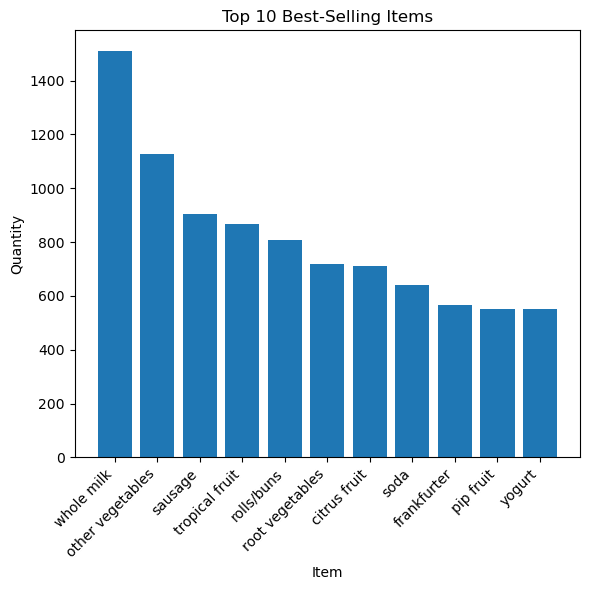

In [13]:
# Create barplot
plt.figure(figsize=(6, 6))
plt.bar(top_10_items['Item'], top_10_items['Quantity'])
plt.xlabel('Item')
plt.ylabel('Quantity')
plt.title('Top 10 Best-Selling Items')
plt.xticks(rotation=45, ha='right')
plt.tight_layout();

A barplot analysis revealed the top 10 best-selling items, with ‘whole milk’, ‘other vegetables’ and ‘sausage’ being the most popular items, suggesting that these products are in high demand among customers. These items might represent staple groceries for many customers, indicating their significance within the stores product offerings.

### Monthly Transaction

In [14]:
monthly_transaction = data.pivot_table(index=[data['Date'].dt.year, data['Date'].dt.month], values='Member_number', aggfunc='count')
monthly_transaction.index = monthly_transaction.index.set_names(['Year', 'Month'])
monthly_transaction.columns = ['No. of Transaction']
monthly_transaction

No. of Transaction
Year Month                    
2014 1                     570
     2                     585
     3                     574
     4                     570
     5                     616
     6                     572
     7                     619
     8                     602
     9                     528
     10                    598
     11                    569
     12                    597
2015 1                    1107
     2                     895
     3                    1029
     4                     978
     5                    1005
     6                    1067
     7                    1002
     8                    1150
     9                     973
     10                    978
     11                   1067
     12                    904

In [15]:
monthly_transaction = monthly_transaction.reset_index()

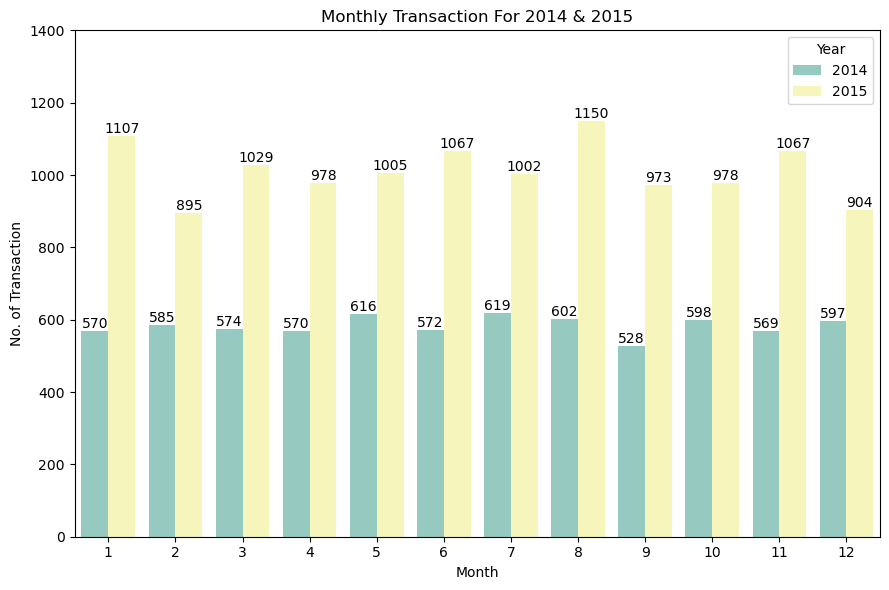

In [16]:
# Set the figure size
plt.figure(figsize=(9, 6))
ax = sns.barplot(x='Month', y='No. of Transaction', hue='Year', data=monthly_transaction, palette="Set3")

plt.title('Monthly Transaction For 2014 & 2015')
plt.xlabel('Month')
plt.ylabel('No. of Transaction')
plt.xticks(rotation=0)
plt.yticks(range(0, 1600, 200))
plt.tight_layout();

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

On the other hand, monthly transaction plot illustrates the fluctuation in transaction numbers for the years 2014 and 2015. In 2014, monthly transactions remain relatively consistent, with counts ranging from 528 to 619. Notably, July stands out as the peak month, indicating potentially higher consumer spending during the summer, assuming the Dataset A is from a store in a region with a Western climate. In contrast, 2015 shows a higher volume of monthly transactions, with counts ranging from 895 to 1150. February marks the lowest point, possibly due to the shorter month, while August records the highest number of transactions, suggesting a peak in customer activity during the late summer months.

In [17]:
# Extract the weekday from the 'Date' column and add it as a new column
data['Weekday'] = data['Date'].dt.strftime('%A') 
# Create a pivot table to count the number of transactions by weekday
weekday_transaction = data.pivot_table(index='Weekday', values='Member_number', aggfunc='count')
weekday_transaction.columns = ['No. of Transaction']
weekday_transaction

,No. of Transaction
Weekday,
Friday,2720
Monday,2600
Saturday,2674
Sunday,2806
Thursday,2835
Tuesday,2687
Wednesday,2833


In [18]:
weekday_transaction.reset_index(inplace=True)
weekday_transaction

,Weekday,No. of Transaction
0,Friday,2720
1,Monday,2600
2,Saturday,2674
3,Sunday,2806
4,Thursday,2835
5,Tuesday,2687
6,Wednesday,2833


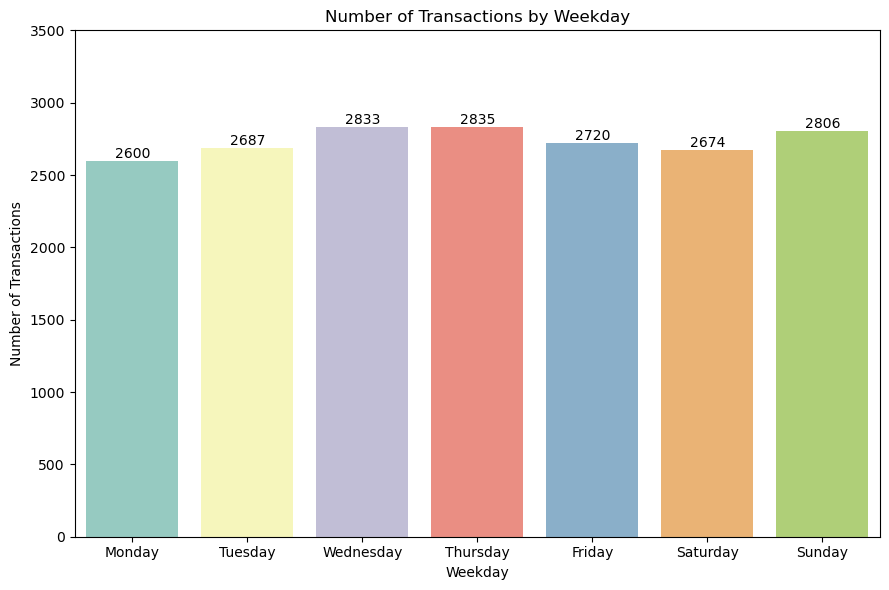

In [19]:
# Define the order of weekdays for the x-axis of the barplot
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Create a barplot
plt.figure(figsize=(9, 6))
ax = sns.barplot(x='Weekday', y='No. of Transaction', data=weekday_transaction, order=weekday_order, palette="Set3")
plt.title('Number of Transactions by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Transactions')
plt.yticks(range(0, 4000, 500))
plt.tight_layout();

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')


The barplot depicting the number of transactions by weekday provides valuable insights into the store’s customer behavior throughout the week. The data shows that Thursday and Wednesday have the highest transaction counts, with 2835 and 2833 transactions respectively. This might indicate that customers are more active in making purchases in the middle of the week. Sunday comes next with 2806 transactions, indicating that weekends are also popular shopping days. Saturday follows closely behind with 2674 transactions, showing consistent customer engagement on the weekend. Tuesday and Friday have 2687 and 2720 transactions respectively, signifying stable midweek and end-of-week shopping patterns. Monday, with 2600 transactions, starts the week with a slightly lower transaction count, possibly reflecting a slower pace at the beginning of the workweek.

# Section 2: Preparation of the dataset

The preparation of Dataset A for association rule mining involves a series of steps, ensuring that the data is organized and encoded appropriately.

In [20]:
data.head()

,Member_number,Date,itemDescription,Weekday
0,1808,2015-07-21,tropical fruit,Tuesday
1,2552,2015-05-01,whole milk,Friday
2,2300,2015-09-19,pip fruit,Saturday
3,1187,2015-12-12,other vegetables,Saturday
4,3037,2015-01-02,whole milk,Friday


### Step 1: Grouping Transactions

The initial step involves grouping the dataset by two key attributes: “Member_number” and “Date”. This grouping is essential to create distinct transactions, where each transaction corresponds to a unique combination of member and date. Within each group, the ‘itemDescription’ column is aggregated as a list, consolidating all items purchased during a specific members shopping trip on a particular date.

### Step 2: Column Renaming

For clarity and consistency, the ‘itemDescription’ column is renamed to ‘Item’, accurately reflecting its content as a list of items purchased in each transaction.

In [21]:
grouped_data = data.pivot_table(index=['Member_number', 'Date'], values = 'itemDescription', aggfunc = {'itemDescription': list}).reset_index()
grouped_data = grouped_data.rename(columns={'itemDescription': 'Item'})

### Step 3: Identifying Transactions with Multiple Items

A new column named ‘Multiple_count_item’ is introduced. Using a lambda function, this column is populated based on whether a transaction contains more than one item. Transactions with multiple items are marked as True, while those with a single item are marked as ‘False’.

In [22]:
grouped_data['Multiple_count_item'] = grouped_data['Item'].apply(lambda x:len(x)>1)
grouped_data

,Member_number,Date,Item,Multiple_count_item
0,1000,2014-06-24,[whole milk],False
1,1000,2015-03-15,"[sausage, whole milk]",True
2,1000,2015-05-27,"[soda, pickled vegetables]",True
3,1000,2015-07-24,"[canned beer, misc. beverages]",True
4,1000,2015-11-25,[sausage],False
...,...,...,...,...
13966,4999,2015-05-16,"[butter milk, whipped/sour cream]",True
13967,4999,2015-12-26,"[bottled water, herbs]",True
13968,5000,2014-09-03,[fruit/vegetable juice],False
13969,5000,2014-11-16,[bottled beer],False


### Step 4: Filtering Transactions

Transactions that meet the criteria of having multiple items (where ‘Multiple_count_item’ is ‘True’) are filtered and retained for further analysis. These transactions represent instances where customers have purchased multiple items in a single shopping session.

In [23]:
filtered_data = grouped_data[grouped_data['Multiple_count_item'] == True]
filtered_data

,Member_number,Date,Item,Multiple_count_item
1,1000,2015-03-15,"[sausage, whole milk]",True
2,1000,2015-05-27,"[soda, pickled vegetables]",True
3,1000,2015-07-24,"[canned beer, misc. beverages]",True
7,1001,2015-01-20,"[frankfurter, soda]",True
27,1006,2015-06-14,"[whole milk, frankfurter, chicken, flour]",True
...,...,...,...,...
13958,4996,2015-11-24,"[rolls/buns, misc. beverages]",True
13960,4997,2015-12-27,"[tropical fruit, white wine]",True
13964,4999,2015-01-24,"[tropical fruit, berries]",True
13966,4999,2015-05-16,"[butter milk, whipped/sour cream]",True


### Step 5: Transaction List Creation

From the filtered dataset, a list of transactions is created. Each transaction is represented as a list of items purchased. This step results in a structured list of transactions, where each transaction contains the items bought together by a customer in a single shopping session.

In [24]:
transaction_list = filtered_data['Item'].apply(lambda x: x).tolist()
transaction_list


[['sausage', 'whole milk'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['frankfurter', 'soda'],
 ['whole milk', 'frankfurter', 'chicken', 'flour'],
 ['hamburger meat', 'liquor (appetizer)'],
 ['tropical fruit', 'soda', 'yogurt'],
 ['herbs', 'yogurt'],
 ['pastry', 'ketchup'],
 ['whole milk', 'frankfurter', 'candles', 'grapes'],
 ['frankfurter', 'yogurt'],
 ['processed cheese', 'whole milk'],
 ['tropical fruit', 'root vegetables', 'rolls/buns'],
 ['frozen meals', 'whole milk'],
 ['white bread', 'meat'],
 ['whole milk', 'sausage'],
 ['citrus fruit', 'whole milk'],
 ['UHT-milk', 'bottled beer'],
 ['rolls/buns', 'frankfurter'],
 ['soda', 'dessert'],
 ['butter milk', 'root vegetables'],
 ['canned beer', 'spices'],
 ['rolls/buns', 'baking powder'],
 ['liquor', 'curd'],
 ['whipped/sour cream', 'root vegetables'],
 ['white bread', 'bottled beer'],
 ['fish', 'root vegetables', 'tropical fruit'],
 ['canned beer', 'UHT-milk'],
 ['fruit/vegetable juice', 'salty snack', '

### Step 6: Transaction Encoding with TransactionEncoder

The TransactionEncoder is initialized to facilitate the transformation of transactions into a binary format. This initialization sets the stage for encoding the data effectively. Following this, the fit method is employed to meticulously identify and learn the unique items within the dataset, ensuring that no item is overlooked. Once the unique items are identified, the transform method is applied to encode the transactions into a binary representation, where the presence of an item is denoted as ‘True’ (1), while its absence is represented as ‘False’ (0). This binary encoding effectively captures the item associations within each transaction. Finally, the result of this encoding process is stored in a structured DataFrame named ‘newdf.’ In ‘newdf’, each column signifies a unique item, and each row corresponds to a transaction, creating a format that is conducive to uncovering valuable patterns and associations among items purchased during customer shopping trips.

In [25]:
from mlxtend.preprocessing import TransactionEncoder

In [26]:
te = TransactionEncoder()
te_data = te.fit(transaction_list).transform(transaction_list)
te_data

array([[False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [27]:
newdf = pd.DataFrame(te_data, columns=te.columns_)
newdf

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4246,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4247,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4248,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4249,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


# SECTION 3: Methodology


In this analysis, association rule mining was employed to uncover meaningful patterns and associations within a dataset. The primary technique utilized for mining these associations is the Apriori algorithm, a classic approach for discovering frequent itemsets and generating association rules. The process includes the following key steps:

### Step 1: Frequent Itemset Generation

The analysis was initiated by employing the Apriori algorithm to identify frequent itemsets in the dataset. Crucial parameters included the min_support threshold. This threshold was determined through multiple trials and errors, ultimately settling at a value of 0.0003. This parameter specifies the minimum level of support that an itemset must meet to be considered frequent, implying that an itemset must appear in a proportion of transactions exceeding this threshold to be considered significant.

In [28]:
pd.set_option('display.max_rows', None)
from apyori import apriori
from mlxtend.frequent_patterns import apriori, association_rules

In [29]:
frequent_itemsets = apriori(newdf, min_support=0.0003, use_colnames=True)
#frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
#frequent_itemsets = frequent_itemsets[frequent_itemsets['length'] > 1]
frequent_itemsets

,support,itemsets
0,0.001647,(Instant food products)
1,0.016467,(UHT-milk)
2,0.000470,(abrasive cleaner)
3,0.001176,(artif. sweetener)
4,0.000470,(baby cosmetics)
5,0.000470,(bags)
6,0.003058,(baking powder)
7,0.000470,(bathroom cleaner)
8,0.055281,(beef)
9,0.024935,(berries)


### Step 2: Association Rule Generation

Following the identification of frequent itemsets, the next step involved the generation of association rules. The primary metric used for rule generation was “confidence”. The min_threshold for confidence was also determined through a process of multiple trials and errors, resulting in a confidence threshold of 0.5 (50%). This threshold ensures that only rules with a confidence of 50% or higher are considered in the final set of rules. Confidence represents the reliability of an association, indicating the likelihood of the consequent item(s) occurring when the antecedent item(s) are present.

In [30]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
# Display the number of rules
print("Number of association rules:", len(rules))

Number of association rules: 42


### Step 3: Rule Sorting and Filtering

After generating association rules, they were sorted based on their confidence values in descending order. Additionally, rules with a confidence of 1, indicating perfect association, were selected. These filtered rules were further sorted based on “lift” values. Lift is a measure that compares observed support to expected support, indicating the strength of association (Aditya, 2023).

In [31]:
sort = rules.sort_values(by='confidence', ascending=False)
sort

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
41,"(pastry, whole milk, yogurt)",(sausage),0.000470,0.113385,0.000470,1.000000,8.819502,0.000417,inf,0.887032
15,"(cream cheese , chicken)",(citrus fruit),0.000470,0.080922,0.000470,1.000000,12.357558,0.000432,inf,0.919510
40,"(sausage, pastry, yogurt)",(whole milk),0.000470,0.175959,0.000470,1.000000,5.683155,0.000388,inf,0.824429
32,"(pet care, hamburger meat)",(whole milk),0.000470,0.175959,0.000470,1.000000,5.683155,0.000388,inf,0.824429
30,"(pastry, ham)",(whole milk),0.000470,0.175959,0.000470,1.000000,5.683155,0.000388,inf,0.824429
29,"(grapes, yogurt)",(tropical fruit),0.000470,0.095272,0.000470,1.000000,10.496296,0.000426,inf,0.905154
27,"(other vegetables, zwieback)",(frankfurter),0.000470,0.081157,0.000470,1.000000,12.321739,0.000432,inf,0.919275
26,"(frankfurter, zwieback)",(other vegetables),0.000470,0.115737,0.000470,1.000000,8.640244,0.000416,inf,0.884679
24,"(dessert, grapes)",(sausage),0.000470,0.113385,0.000470,1.000000,8.819502,0.000417,inf,0.887032
39,"(whole milk, sweet spreads)",(pip fruit),0.000706,0.059515,0.000470,0.666667,11.201581,0.000428,2.821454,0.911370


In [32]:
confident_lift = sort[sort['confidence'] == 1]
confident_lift.sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
15,"(cream cheese , chicken)",(citrus fruit),0.00047,0.080922,0.00047,1.0,12.357558,0.000432,inf,0.919510
27,"(other vegetables, zwieback)",(frankfurter),0.00047,0.081157,0.00047,1.0,12.321739,0.000432,inf,0.919275
29,"(grapes, yogurt)",(tropical fruit),0.00047,0.095272,0.00047,1.0,10.496296,0.000426,inf,0.905154
41,"(pastry, whole milk, yogurt)",(sausage),0.00047,0.113385,0.00047,1.0,8.819502,0.000417,inf,0.887032
24,"(dessert, grapes)",(sausage),0.00047,0.113385,0.00047,1.0,8.819502,0.000417,inf,0.887032
26,"(frankfurter, zwieback)",(other vegetables),0.00047,0.115737,0.00047,1.0,8.640244,0.000416,inf,0.884679
40,"(sausage, pastry, yogurt)",(whole milk),0.00047,0.175959,0.00047,1.0,5.683155,0.000388,inf,0.824429
32,"(pet care, hamburger meat)",(whole milk),0.00047,0.175959,0.00047,1.0,5.683155,0.000388,inf,0.824429
30,"(pastry, ham)",(whole milk),0.00047,0.175959,0.00047,1.0,5.683155,0.000388,inf,0.824429


In [33]:
help(apriori)


Help on function apriori in module mlxtend.frequent_patterns.apriori:

apriori(df, min_support=0.5, use_colnames=False, max_len=None, verbose=0, low_memory=False)
    Get frequent itemsets from a one-hot DataFrame
    
    Parameters
    -----------
    df : pandas DataFrame
      pandas DataFrame the encoded format. Also supports
      DataFrames with sparse data; for more info, please
      see (https://pandas.pydata.org/pandas-docs/stable/
           user_guide/sparse.html#sparse-data-structures)
    
      Please note that the old pandas SparseDataFrame format
      is no longer supported in mlxtend >= 0.17.2.
    
      The allowed values are either 0/1 or True/False.
      For example,
    
    ```
             Apple  Bananas   Beer  Chicken   Milk   Rice
        0     True    False   True     True  False   True
        1     True    False   True    False  False   True
        2     True    False   True    False  False  False
        3     True     True  False    False  False  Fa

# SECTION 4: Result and Interpretation

### The Analysis Outcome and Performance Measure   
    
The analysis outcome provides valuable insights into the association patterns within the stores daily transaction data, utilizing various performance measures derived from association rule mining. While multiple performance measures were generated, the focus of interpretation centers on antecedents, consequents, confidence, and lift values for the following reasons:


1. **Antecedents and Consequents:** These are essential components of an association rule. Antecedents represent the items or conditions that precede an event or outcome, while consequents represent the items that follow or result from the event. Understanding the antecedents and consequents is fundamental to grasping the rules meaning and practical implications (Leskovec, Rajaraman, & Ullman, 2020).

2. **Confidence:** Confidence quantifies the strength of an association rule by indicating the conditional probability of the consequent item(s) given the antecedent item(s). It directly measures how reliably the rule predicts the occurrence of the consequent, making it a crucial metric for assessing the rules practical significance (Leskovec et al., 2020).

3. **Lift:** Lift quantifies the degree of association between the antecedent and consequent items in a rule. It tells us whether the observed co-occurrence of these items is significant compared to what would be expected by chance. A lift value greater than 1 suggests a positive association, making it a key indicator of rule interestingness (Leskovec et al., 2020).

The focus on these specific performance measures is justified because they provide actionable insights for the store owner. By examining antecedents and consequents, the owner can identify which items tend to be purchased together, informing decisions on item placement within the store. Confidence values help determine the reliability of these associations, guiding marketing and promotion strategies, such as bundling or cross-selling. Meanwhile, lift values indicate the strength and relevance of the associations, allowing the owner to prioritize item combinations with the highest potential for increasing sales.

While other performance measures like support, leverage, conviction, and Zhangs metric provide additional context and insights, antecedents, consequents, confidence, and lift values are foundational for understanding and implementing changes that directly impact sales and customer behavior. Therefore, focusing on these measures aligns with the store owners goal of improving sales and optimizing the placement of items in the store.

### Interpretation of The Outcome and Recommendations

In the analysis of the daily transaction from the store, there are 42 association rules that was identified with a lift value exceeding 1, indicating a positive association between certain items. Out of these 42 rules, 9 rules stand out as particularly interesting because they exhibit a high level of confidence and have lift values ranging from 5.683155 to 12.357558. This perfect confidence indicates that whenever the antecedent items are purchased together, the consequent items are always present in the same transaction. Let’s delve into these significant findings:

1. The rule (chicken, cream cheese) → (citrus fruit) has both perfect confidence and the highest lift value of 12.357558. This suggests that whenever a customer purchases chicken and cream cheese together, they are guaranteed to buy citrus fruit as well. The store could consider placing these items close to each other to further encourage this association.

2. Another noteworthy rule is (other vegetables, zwieback) → (frankfurter) with a lift of 12.321739. It indicates that customers who buy other vegetables and zwieback always purchase frankfurter. Placing these items in proximity may lead to increased sales of frankfurter.

3. (yogurt, grapes) → (tropical fruit) has a lift of 10.496296. This suggests that when yogurt and grapes are bought together, customers always purchase tropical fruit. Grouping these items could boost sales of tropical fruit.

4. Both (yogurt, pastry, whole milk) → (sausage) and (dessert, grapes) → (sausage) have a lift of 8.819502. This implies that customers who buy yogurt, pastry, whole milk, dessert, or grapes always add sausage to their shopping carts. The store can capitalize on this by displaying sausages near these items.

5. (zwieback, frankfurter) → (other vegetables) has a lift of 8.640244, indicating that customers buying zwieback and frankfurter always purchase other vegetables as well. Co-locating these items may encourage more vegetable sales.

6. (yogurt, sausage, pastry) → (whole milk), (pet care, hamburger meat) → (whole milk), and (pastry, ham) → (whole milk) all have a lift of 5.683155, showcasing a moderate but perfect association between these item groups. Placing these items close to whole milk could potentially increase sales.


In light of these findings, the store owner should consider rearranging the placement of items within the store to leverage these associations and potentially boost sales. Strategies could include grouping or positioning related items together on shelves or near each other in the store layout. Additionally, the store might want to promote these associations through marketing and signage to encourage customers to make these complementary purchases. Regular monitoring of these associations and adjusting the store layout

### REFRENCES

Aditya. (2023). Association rule mining explained with examples. Retrieved from https://codinginfinite.com/association-rule-mining-explained-with-examples/

Leskovec, J., Rajaraman, A., & Ullman, J. (2020). Mining of Massive Datasets.